In [1]:
import numpy as np
from sklearn.neighbors import KDTree
from sklearn.utils import check_random_state
import random
import pickle
import math
import AstroMLmod
import matplotlib.pyplot as plt
import time

In [21]:

def double_fact(number):
    if number==0 or number==1:
        return 1
    else:
        return number*double_fact(number-2)

def hypersphere_surface_area(m = 2, r=1):
    if m == 1 or m==0:
        return 1
    """
    Compute the surface area of a hypersphere (the boundary of an n-ball)
    of radius r in R^n.
    
    Parameters:
      n : int or float
          The dimension of the ambient space (so the hypersphere is (n-1)-dimensional)
      r : float, optional
          The radius of the sphere (default is 1)
    
    Returns:
      float
          The surface area S_{n-1}(r) = (2 * π^(n/2) / Γ(n/2)) * r^(n-1)
    """
    return ( (2**(int((m+1)/2))) *(math.pi**int(m/2))  *(r**(m-1)) )/double_fact(m-2) 





def calculate_distance(p1, p2, metric='euclidean'):
    """
    Calculate the distance between two points in arbitrary dimensions.

    Parameters:
        p1 (array-like): Coordinates of the first point.
        p2 (array-like): Coordinates of the second point.
        metric (str): Distance metric to use. Options are 'euclidean' or 'manhattan'
                      (case-insensitive). Default is 'euclidean'.

    Returns:
        float: The distance between p1 and p2 using the specified metric.

    Raises:
        ValueError: If p1 and p2 have different dimensions or if the metric is unsupported.
    """
    p1 = np.array(p1)
    p2 = np.array(p2)
    ##Remove
    return np.linalg.norm(p1 - p2)
    
    if p1.shape != p2.shape:
        raise ValueError("Both points must have the same number of dimensions.")
    
    metric = metric.lower()
    
    if metric == 'euclidean':
        # np.linalg.norm computes the Euclidean (L2) norm.
        return np.linalg.norm(p1 - p2)
    elif metric == 'manhattan':
        # Manhattan distance is the sum of absolute differences.
        return np.sum(np.abs(p1 - p2))
    else:
        raise ValueError("Unsupported metric. Choose either 'euclidean' or 'manhattan'.")


def scale_and_sample(pca_features, sub_sample_size = 2, n_output_features = None, seed = random.seed()):

    #obtain an aray of the elements of highest variance
    first_elements = pca_features[:,0]
    #compute the mean and std
    mean = np.mean(first_elements)
    std_dev = np.std(first_elements)
    np.seed = seed
        
    #scale the representations
    scaled_rep = np.array([(representation-mean)/std_dev for representation in pca_features])

    #Subsample
    
    sampled = scaled_rep[np.random.choice(pca_features.shape[0], sub_sample_size, replace=False)]
    if n_output_features == None:
        return sampled
    #Reduce the dimension, get only the first n features 
    else:
        smaller = []
        for sample in sampled:
            smaller.append(sample[:n_output_features])

        return smaller


def binner(distance,bins,bin_size, maximum_distance ):
    if distance < maximum_distance:
        bins[int(distance/bin_size)] +=1

    return bins

In [6]:
time1 = time.time()
dimension = data.shape[0]
distance_distribution = [0]*bin_number
for i in range(80000):
    p1,p2 = data[np.random.choice(dimension, 2, replace=False)]
    distance_distribution = binner(calculate_distance(p1,p2),distance_distribution,bin_size,maximum_distance = 2)
    
for i in range(bin_number):
    distance_distribution[i] = distance_distribution[i]/(bin_size*hypersphere_surface_area(m = 2, r=bins[i]))

plt.plot(distance_distribution)


print(time1-time.time())

NameError: name 'data' is not defined

In [1]:
plt.plot(distance_distribution)

NameError: name 'plt' is not defined

In [4]:
maximum_distance = 2
bin_number = 100
bin_size = maximum_distance/bin_number

bins = np.linspace(0, maximum_distance, bin_number)

dist.scatter_points(data)
bins

NameError: name 'np' is not defined

In [61]:

#Features stored using pickle

with open("ijepa_space.csv",'rb') as file:
    ijepa_rep = pickle.load(file)

with open("ijepa_back_space.csv",'rb') as file:
    ijepa_back_rep = pickle.load(file)

In [137]:
data_raw = ijepa_rep
number_of_samples = 10000
seed= 42
data = AstroMLmod.scale_and_sample(data_raw,n_output_features = 2,sub_sample_size = number_of_samples,seed = seed)

data = gaussian_space

maximum_distance = 4
resolution = 100
bin_size = maximum_distance/resolution

bins = np.linspace(0, maximum_distance, resolution)

In [142]:
tree = KDTree(data)
counts_DD = tree.two_point_correlation(data, bins, dualtree = False)
#DD = np.diff(counts_DD)

In [2]:
DD = np.diff(counts_DD)
plt.plot(bins[1:],np.diff(counts_DD))

NameError: name 'np' is not defined

In [155]:
corr = []
for Bin, radius in zip(counts_DD,bins):
    corr.append(Bin/hypersphere_surface_area(2, r=radius))


C:\Users\koket\AppData\Local\Temp\ipykernel_17628\2348922478.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  corr.append(Bin/hypersphere_surface_area(2, r=radius))


In [3]:
plt.plot(counts_DD)


NameError: name 'plt' is not defined

<Figure size 1920x1440 with 0 Axes>

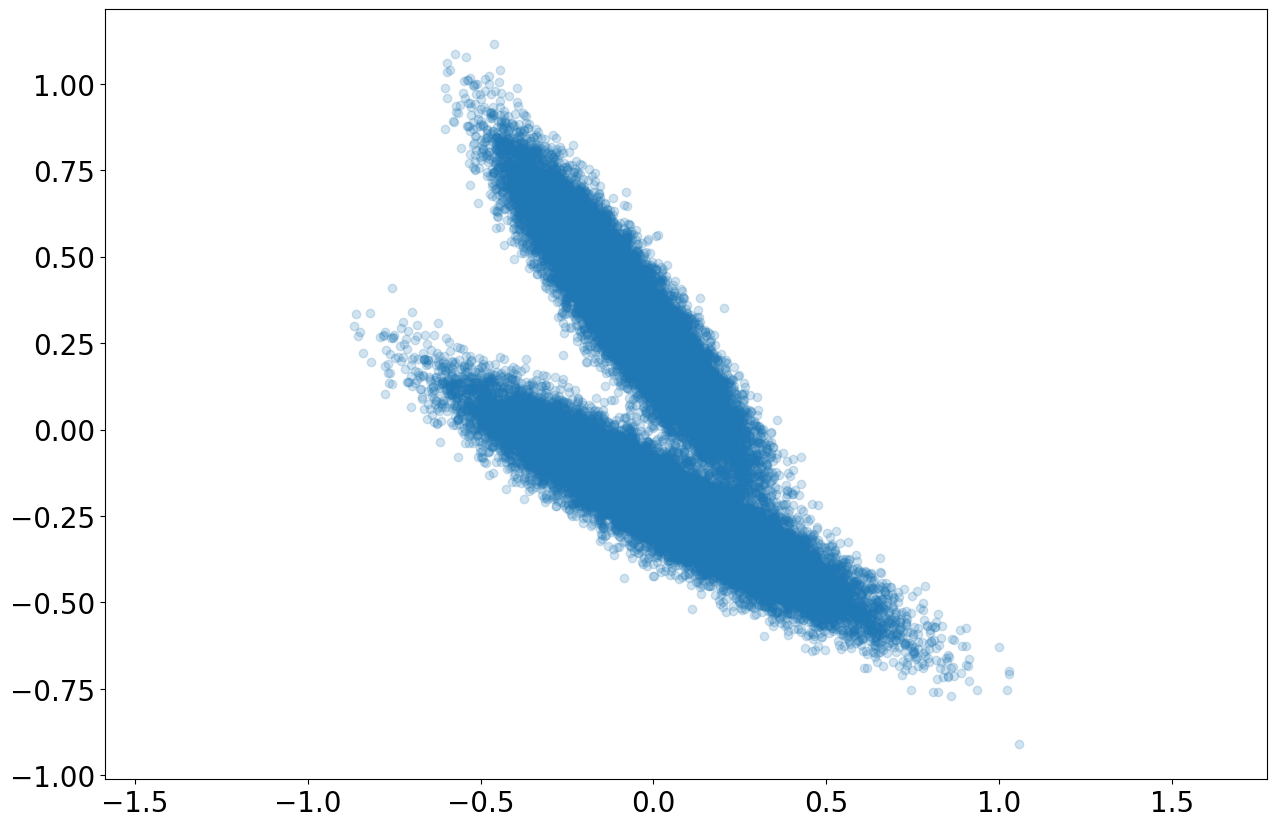

In [63]:
import Distributions as dist

dimensions = 2  
mean_range = (-0.50, 0.50)
cov_range = (-0.20, 0.2)  
num_samples = 2
points_per_gaussian = 30000
n_points = points_per_gaussian*num_samples
a = 0.2
b = 100
bins = np.linspace(0, a, b)

means,covariances, covariances_sparse = dist.sample_means_and_covariances(dimensions, mean_range, cov_range, num_samples,seed = 100)
gaussian_space = dist.generate_gaussian_points(means[0], covariances[0],points_per_gaussian)
for mean,covariance in zip(means[1:],covariances[1:]):
        
    gaussian_space = np.concatenate((gaussian_space,dist.generate_gaussian_points(mean, covariance,points_per_gaussian)),axis = 0)
dist.scatter_points(gaussian_space,alpha = 0.2) 




data = gaussian_space
